In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
# from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# splitting data and model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter
# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
# feature importance
# import shap
import kagglehub


In [6]:
df=pd.read_csv('Electric_Vehicle_Population_Data .csv' ,encoding='utf-8', sep=',')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200043,JTMAB3FVXR,Snohomish,Snohomish,WA,98290.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10
200044,7FCTGAAA7P,Pierce,Orting,WA,98360.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
200045,1V2GNPE87P,Spokane,Spokane,WA,99201.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,WA,98043.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10


In [7]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,VIN (1-10)[object],1. 7SAYGDEE6P2. 7SAYGDEE7P3. 7SAYGDEEXP4. 7SAYGDEE8P5. 7SAYGDEE5P6. 7SAYGDEE9P7. 7SAYGDEE0P8. 7SAYGDEE2P9. 7SAYGDEE3P10. 7SAYGDEE1P11. other,"1,219 (0.6%)1,216 (0.6%)1,181 (0.6%)1,178 (0.6%)1,175 (0.6%)1,147 (0.6%)1,140 (0.6%)1,139 (0.6%)1,125 (0.6%)1,107 (0.6%)188,421 (94.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1KElA6Wk1wUck6VIsUUV8Pk678szufzgMLDrR+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKM8TTGGOfz+eXGz8KdW242m+cxxlgsFl8Fx9/0ME3Tepqm9Rjj8dYPw33zzUZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZJbzPB8vf3676ZNw92wQyCz8l1lUvNnIWFeRsa4i4+iDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZ18LJGLyQ8WYjY/BCxuCFjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxjcbGT+jZKyryFhXkfHNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGvhZKyryHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjA0CGesqMt5sZKyryFhXkXH0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGvhZAxeyHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IeObjYyfUTLWVWSsq8j4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca1cDLWVWS82cgYvJAxeCHj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJD5+WZzJZzf9Xbt13G52WyeLxsE+LR5no/XRlPLaZrWu93uZbVavZYPx/04nU5f9vv9+nA4PI4x3o9tjDFWq9Xrdrv9lj0d9+jp2l9wzkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmOcaPKyK3fhD+XR/tZznP83G/36/HB66IwHsuw6lfjqZcC+dPuXot3OCFjH8gkBEbGbGRERsZsZERGxmxkREbGbGR+Q6r/BAn38TSMAAAAABJRU5ErkJggg=="">",0(0.0%)
2,County[object],1. King2. Snohomish3. Pierce4. Clark5. Thurston6. Kitsap7. Spokane8. Whatcom9. Benton10. Skagit11. other,"102,837 (51.4%)23,933 (12.0%)15,739 (7.9%)11,872 (5.9%)7,297 (3.6%)6,686 (3.3%)5,261 (2.6%)4,829 (2.4%)2,482 (1.2%)2,171 (1.1%)16,941 (8.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEg0lEQVR4nO3dQU4bZwCG4R9kpWFjy4rEMXIADtHD9hA+QO6BEF4Emg1dpIqSYsA2M6/l9HnWsTSKXsaa0f/BxdPT04DC5akvgP8PsZERGxmxkREbGbGRERsZsZERG5mLMcbVGOPDqS/kjH17enp6OPVFnIPFp0+f/lwul+tTX8i52m63dxcXF38J7m2L5XK5vrm5eVitVo+nvphzc39//3Gz2axvb28/jDHE9obFGGOsVqvH6+vrr6e+mDN1deoLOBceEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxijO/nsk59IefI/9thFtvt9m6z2ayHc1lH2W63d2OMb6e+jnNgg/B+Ngh7uvArs6hMfWfzU86LJl1XWRrxmsnWVZZGvGXqdZUnWl7kpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZyQYvxh+8ZdLBi/EHr3EsnIzBC5lj7mzuXhzl4MGLUQvHOmjwYtTCexwzeDFq4She6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZE5aPBi1MJ7HDx4MWrhWI6FkzF4IeMBgcy+X6O+Onm3vdZVFlVM4c11lUUVU9l3XWVRxbt5QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPz5rrKooqp7LWusqhiCo6Fk7GuIvPanc3djEm9OHgxcmFqOwcvRi7M4bXBi5ELk/JSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczOwYuRC3N4cfBi5MLUHAsnY/BC5qU7m7sak9s5eDF2YQ7PBi/GLszlpcGLsQuT81KXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIPFtXWVYxl53rKssq5mCDQMa6isyuO5u7GrN4tq6yrGIuv6yrLKuY0651lWUVs/BSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcwvgxdjF+b0bPBi7MJcHAsnY/BCxp2NjMELGYMXMgYvZLzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxj4WQMXsh4QCDz89eor09m9WNdZVXF3C6Xy+X68+fP498533//FCRM5nKMMa6urv4+9YXw+/OAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZyjDEeHh7+OPWF8Pu73G63d1++fLGqYnaOhZOxriLjzkbG4IWMwQsZgxcyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZHb9obR9uAtysB+Dl0M+ZBzDMRbL5XJ9c3PzsFqtHvf5wP39/cfNZrO+vb39MMYQG3tbjDHGarV6vL6+/nrA565muh5+Y17qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmM8f3Y0L4fOOTfws8W2+32brPZrMcBx4aMYziGY+FkDF7IeEAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzD3aWMKzYYcw2AAAAAElFTkSuQmCC"">",4(0.0%)
3,City[object],1. Seattle2. Bellevue3. Redmond4. Vancouver5. Bothell6. Kirkland7. Renton8. Sammamish9. Olympia10. Tacoma11. other,"32,602 (16.3%)9,96

In [8]:
df.dropna(inplace=True)

In [9]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200043,JTMAB3FVXR,Snohomish,Snohomish,WA,98290.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10
200044,7FCTGAAA7P,Pierce,Orting,WA,98360.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
200045,1V2GNPE87P,Spokane,Spokane,WA,99201.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,WA,98043.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10


In [10]:
df['Electric Vehicle Type'].replace(to_replace='Battery Electric Vehicle (BEV)',value='BEV',inplace=True)
df['Electric Vehicle Type'].replace(to_replace='Plug-in Hybrid Electric Vehicle (PHEV)',value='PHEV',inplace=True)

In [11]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,BEV,Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,BEV,Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,BEV,Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200043,JTMAB3FVXR,Snohomish,Snohomish,WA,98290.0,2024,TOYOTA,RAV4 PRIME,PHEV,Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10
200044,7FCTGAAA7P,Pierce,Orting,WA,98360.0,2023,RIVIAN,R1T,BEV,Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
200045,1V2GNPE87P,Spokane,Spokane,WA,99201.0,2023,VOLKSWAGEN,ID.4,BEV,Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,WA,98043.0,2014,CHEVROLET,VOLT,PHEV,Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10


In [12]:
def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    
    return state_mapping.get(state_code, 'Unknown')

# apply the 'state_mapping' function to 'State' column
df['State'] = df['State'].apply(state_mapping)

In [13]:
def set_long_location(loc):
    loc=loc.replace('(',' ').replace(')',' ').split(' ')
    long=loc[2]
    return long
def set_lat_location(loc):
    loc=loc.replace('(',' ').replace(')',' ').split(' ')
    lat=loc[3]
    return lat


In [14]:
df['Longitude'] = df['Vehicle Location'].apply(set_long_location)
df['Latitude'] = df['Vehicle Location'].apply(set_lat_location)

In [15]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJ3E1EB0J,Thurston,Olympia,Washington,98512.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10,-122.957046,46.991391
1,WA1AAAGE9M,Kitsap,Port Orchard,Washington,98367.0,2021,AUDI,E-TRON,BEV,Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10,-122.6530052,47.4739066
2,5YJ3E1EA2J,Yakima,Yakima,Washington,98902.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10,-120.530331,46.59534
3,5YJ3E1EA4N,Yakima,Yakima,Washington,98902.0,2022,TESLA,MODEL 3,BEV,Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10,-120.530331,46.59534
4,7SAYGAEE2P,Snohomish,Bothell,Washington,98012.0,2023,TESLA,MODEL Y,BEV,Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,-122.206146,47.839957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200043,JTMAB3FVXR,Snohomish,Snohomish,Washington,98290.0,2024,TOYOTA,RAV4 PRIME,PHEV,Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10,-122.0483457,47.9435765
200044,7FCTGAAA7P,Pierce,Orting,Washington,98360.0,2023,RIVIAN,R1T,BEV,Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,-122.197791,47.0948565
200045,1V2GNPE87P,Spokane,Spokane,Washington,99201.0,2023,VOLKSWAGEN,ID.4,BEV,Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10,-117.428902,47.658268
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,Washington,98043.0,2014,CHEVROLET,VOLT,PHEV,Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10,-122.306706,47.792043


In [16]:
# define a function to change low-frequency category values into "Others"
def change_to_others(data, column_name, percent):
    
    data = data.copy()
    
    # calculate the value counts of the column as proportions, 
    value_counts = data[column_name].value_counts(normalize=True)
    
    # identify values with frequencies below the specified percentage threshold,
    low_frequency_values = value_counts[value_counts < percent].index
    
    # replace low-frequency values with "Others"
    data[column_name] = np.where(data[column_name].isin(low_frequency_values), "Others", data[column_name])

    return data

<Axes: xlabel='County', ylabel='count'>

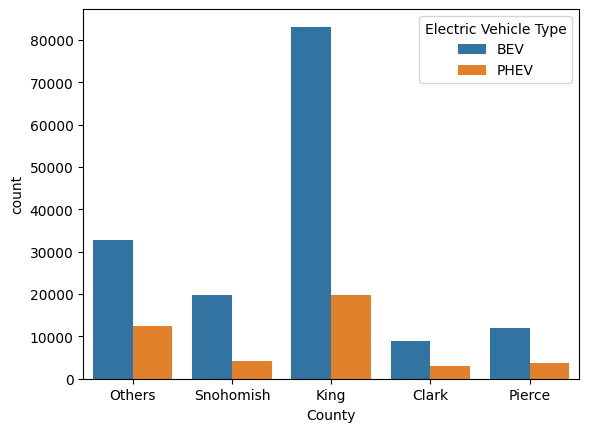

In [17]:
df2 = change_to_others(df, 'County', 0.05)
sns.countplot(x='County',hue='Electric Vehicle Type',data=df2)

<Axes: xlabel='City', ylabel='count'>

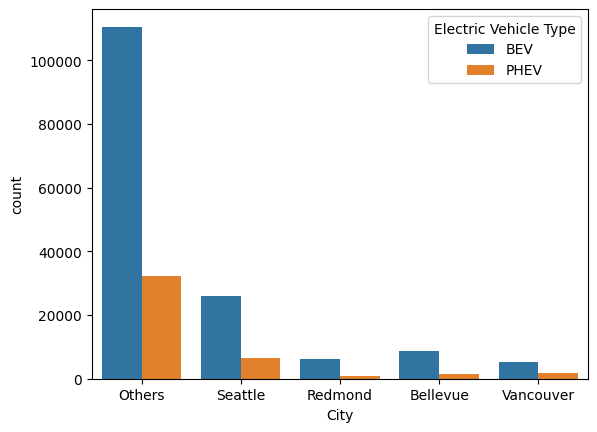

In [18]:
df2 = change_to_others(df, 'City', 0.035)
sns.countplot(x='City',hue='Electric Vehicle Type',data=df2)

<Axes: xlabel='Model Year', ylabel='count'>

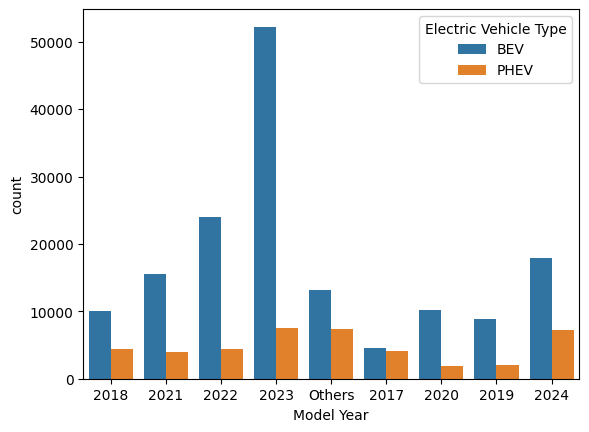

In [19]:
df2 = change_to_others(df, 'Model Year', 0.035)
sns.countplot(x='Model Year',hue='Electric Vehicle Type',data=df2)

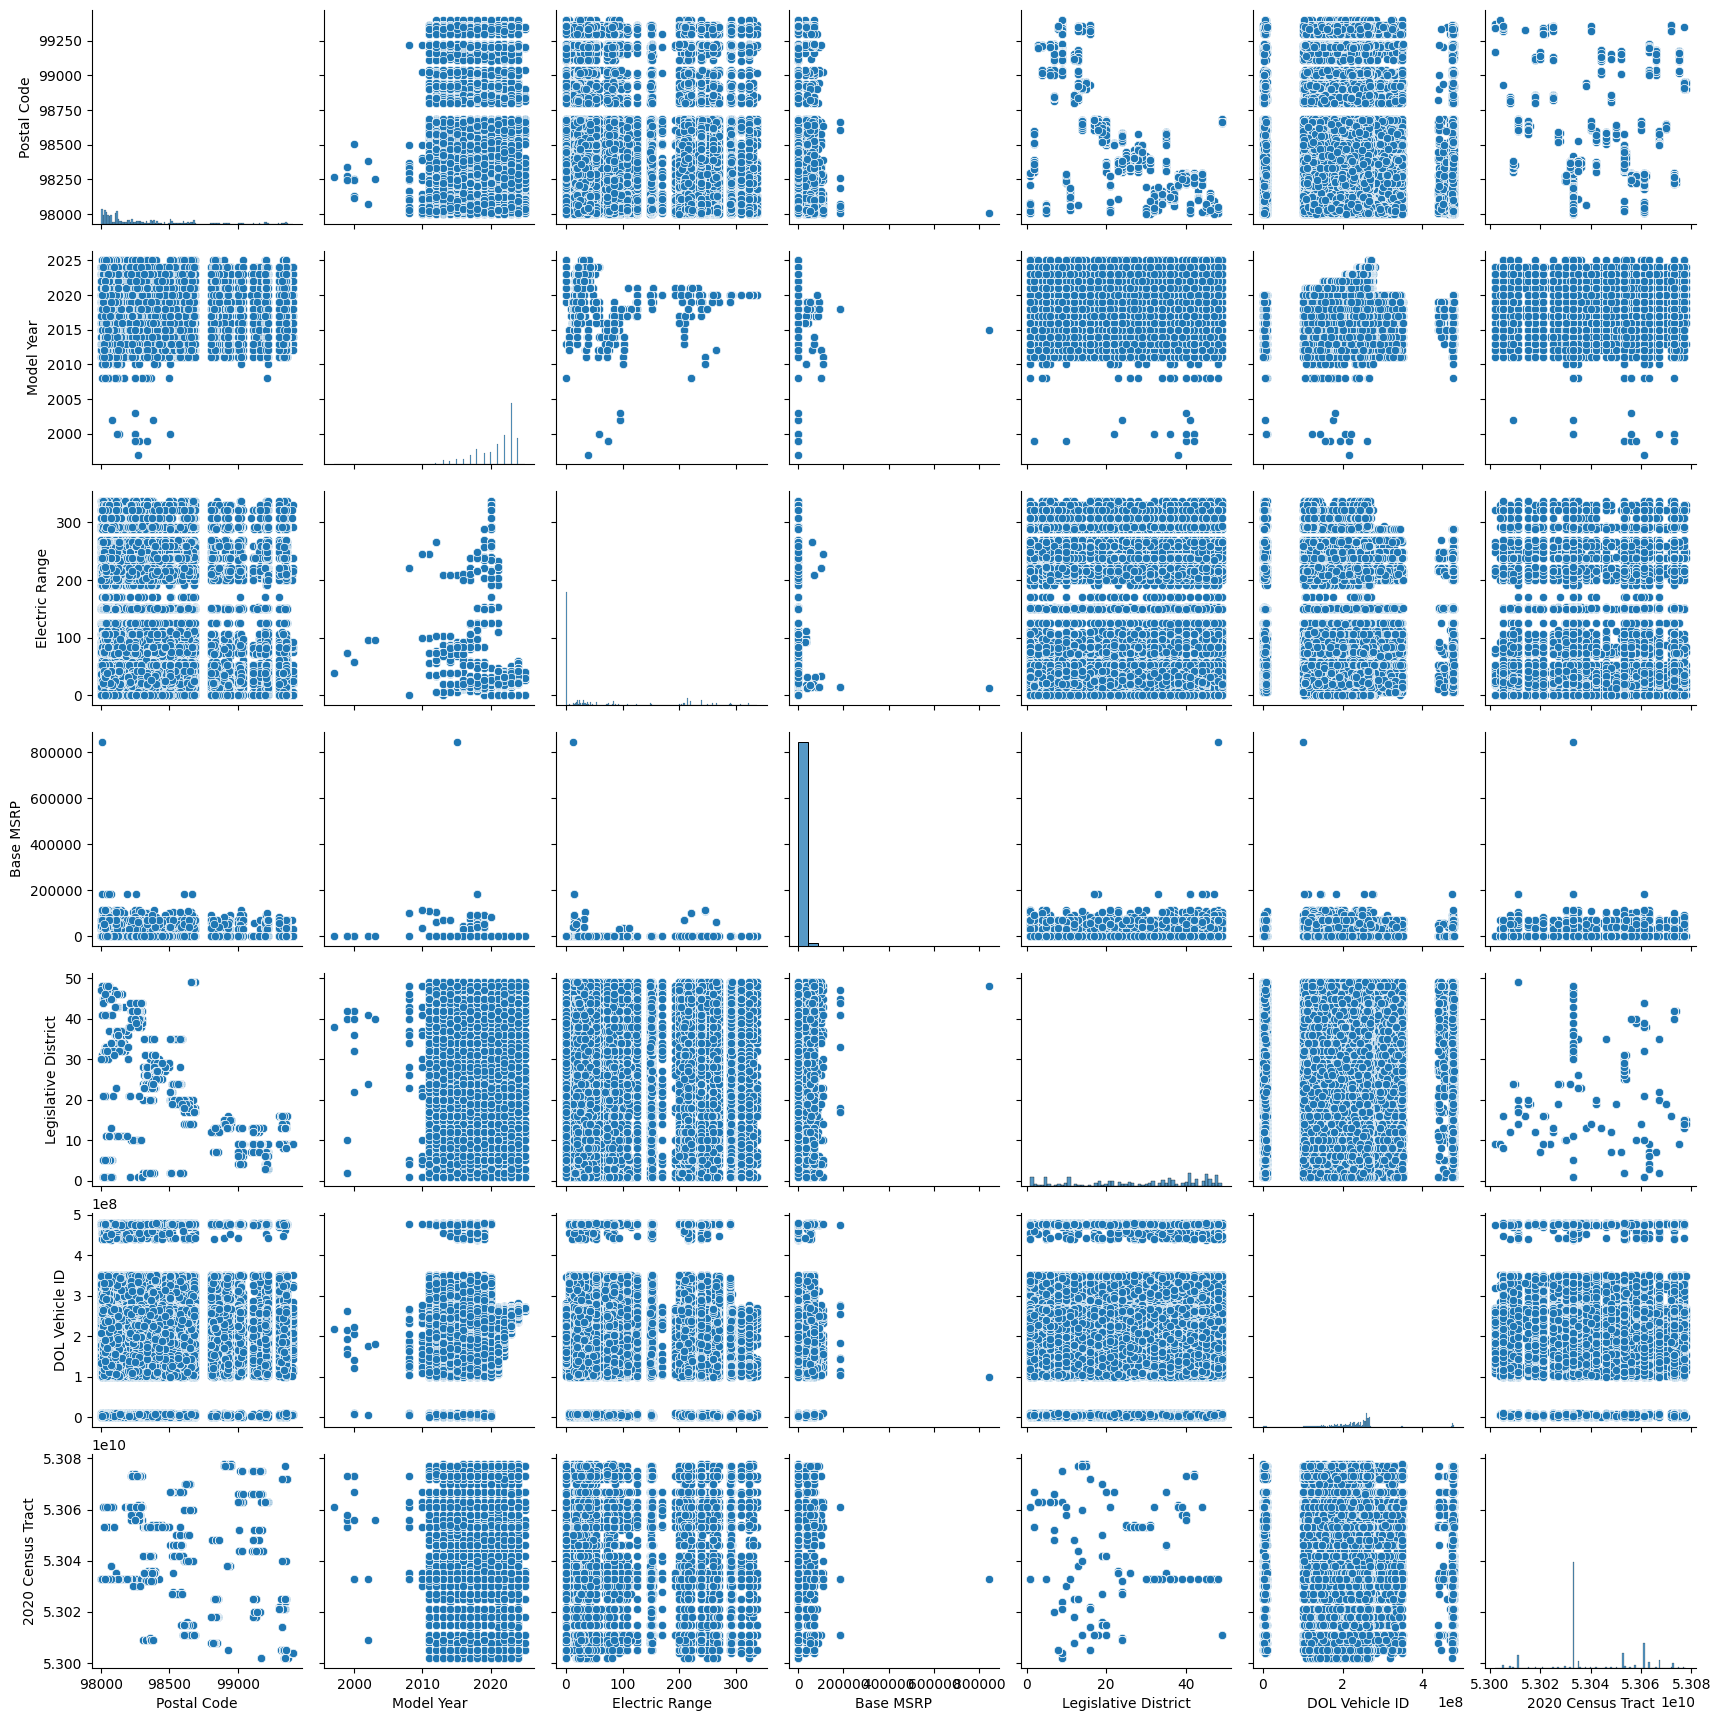

In [16]:
sns.pairplot(df)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VIN (1-10)']=le.fit_transform(df['VIN (1-10)'])
df.Make=le.fit_transform(df.Make)
df.State=le.fit_transform(df.State)
df.County=le.fit_transform(df.County)
df.City=le.fit_transform(df.City)
df.Model=le.fit_transform(df.Model)
df['Electric Utility']=le.fit_transform(df['Electric Utility'])
df['Electric Vehicle Type']=le.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [21]:
df.drop(columns='Vehicle Location',inplace=True)


In [22]:
df['Longitude']=pd.to_numeric(df['Longitude'])
df['Latitude']=pd.to_numeric(df['Latitude'])
df.dtypes


VIN (1-10)                                             int32
County                                                 int32
City                                                   int32
State                                                  int32
Postal Code                                          float64
Model Year                                             int64
Make                                                   int32
Model                                                  int32
Electric Vehicle Type                                  int32
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int32
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Electric Utility                                       int32
2020 Census Tract                                    float64
Longitude               

In [23]:
# initialize X as features and y as target
X = df.drop('Electric Vehicle Type', axis=1)
y = df['Electric Vehicle Type'].values.reshape(-1,1)

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [21]:
n_estimators = [50, 100, 200, 300, 500]  
max_depth = [None, 10, 20, 30, 40]  
min_samples_split = [2, 5, 10]  
min_samples_leaf = [1, 2, 4]  
bootstrap = [True, False]  

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    # 'min_samples_split': min_samples_split,
    # 'min_samples_leaf': min_samples_leaf,
    # 'bootstrap': bootstrap
}

In [22]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=42)

# grid_rf = GridSearchCV(estimator=rf,
#                        param_grid=param_grid,
#                        cv=10,
#                        verbose=0,
#                        n_jobs=-1)
# grid_rf.fit(X_train, y_train)

# print("Best score:", grid_rf.best_score_)
# print("Best params:", grid_rf.best_params_)

In [23]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9999332008483492
ROC AUC Score: 0.9999574395641811
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46992
           1       1.00      1.00      1.00     12889

    accuracy                           1.00     59881
   macro avg       1.00      1.00      1.00     59881
weighted avg       1.00      1.00      1.00     59881

Confusion Matrix:

 [[46988     4]
 [    0 12889]]


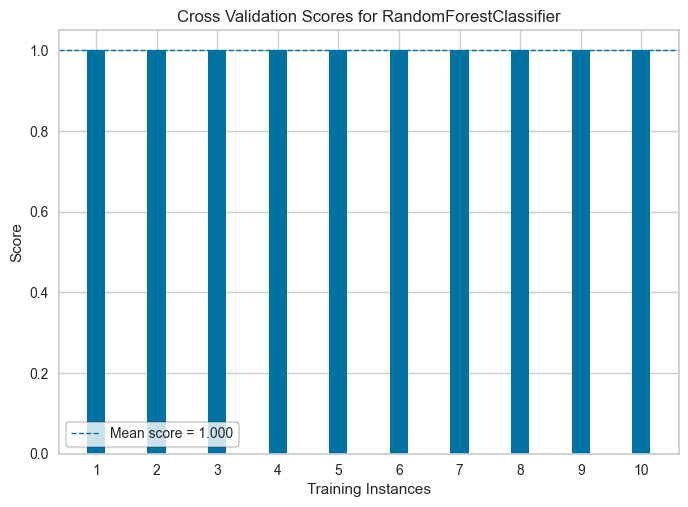

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    RandomForestClassifier(
      n_estimators= 100
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(X_train, y_train)
oz.poof();

In [25]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# initialize the XGBoost classifier and fit it to the resampled training data
XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = XGB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9998831014846111
ROC AUC Score: 0.999925519237317
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46992
           1       1.00      1.00      1.00     12889

    accuracy                           1.00     59881
   macro avg       1.00      1.00      1.00     59881
weighted avg       1.00      1.00      1.00     59881

Confusion Matrix:

 [[46985     7]
 [    0 12889]]


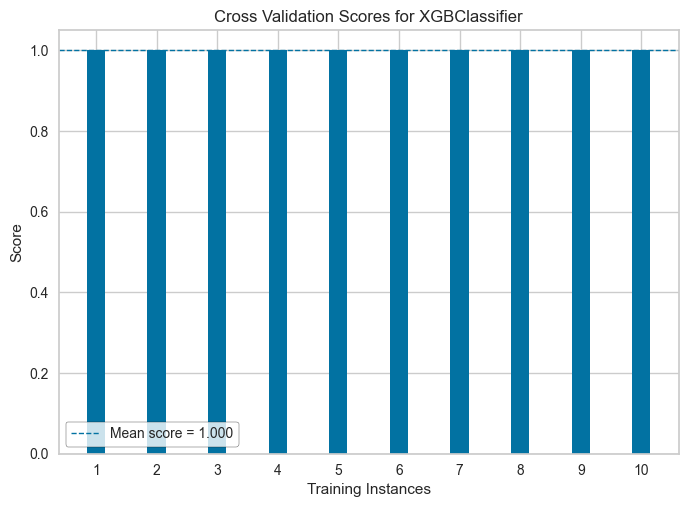

In [26]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    xgb.XGBClassifier(
     **params
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(X_train, y_train)
oz.poof();

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [76]:
model = Sequential([


    # dense layer 2
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
   Dropout(0.3),
    Dense(64, activation='relu'),

   Dropout(0.2),
    
    Dense(32, activation='relu'),

      # output layer
    Dense(2, activation='linear'),
])

In [77]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=100,
          batch_size=256,
          validation_split=0.2)

Epoch 1/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7786 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 2/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7834 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 3/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 4/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 5/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 6/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 7/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 8/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: nan - val_accuracy: 0.7849 - val_loss: nan
Epoch 9/100
437/

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
135876,7228,16,376,0,98125.0,2022,19,51,1,0,0,46.0,198813968,55,5.303300e+10,-122.304356,47.715668
68731,5359,16,376,0,98199.0,2023,36,89,1,0,0,36.0,258003399,55,5.303301e+10,-122.394937,47.649547
124235,6259,36,31,0,98225.0,2015,7,130,0,82,0,42.0,112486608,72,5.307300e+10,-122.488380,48.740767
112287,4723,26,211,0,98498.0,2021,36,89,1,0,0,28.0,153811094,71,5.305307e+10,-122.557924,47.163640
16910,984,33,343,0,98576.0,2018,7,141,0,53,0,2.0,196177600,70,5.306701e+10,-122.677141,46.888241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,5561,10,319,0,99301.0,2018,15,27,0,47,0,9.0,328411975,37,5.302102e+10,-119.142964,46.254653
91533,10536,16,97,0,98042.0,2017,30,25,2,14,0,47.0,109655178,71,5.303303e+10,-122.114514,47.358111
90302,3707,16,376,0,98126.0,2021,36,86,1,0,0,34.0,148403146,55,5.303301e+10,-122.375221,47.546595
160904,6706,16,143,0,98003.0,2023,16,77,1,0,0,30.0,228557731,71,5.303303e+10,-122.318442,47.315173
